In [3]:
import numpy as np 
import pandas as pd

df = pd.read_csv("../data/placement.csv")
df.head
print(df)




    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]


In [4]:

df1 = df.iloc[: , 0:2]
print(df1)


    Unnamed: 0  cgpa
0            0   6.8
1            1   5.9
2            2   5.3
3            3   7.4
4            4   5.8
..         ...   ...
95          95   4.3
96          96   4.4
97          97   6.7
98          98   6.3
99          99   6.2

[100 rows x 2 columns]


now this is a preprocessing , you have selcted ypour desired roes and coumns 

In [5]:
df.info()
df1 = pd.DataFrame(df)
print(df)
print(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]
    Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0    

#steps


0: preprocess+EDA+feature selection(that means relevasnt input column selection)
1: extract input and output cells
2: scale the valus
3: train test split
4: Train the model
5: evaluate the model/Model selection
6: deploy the model

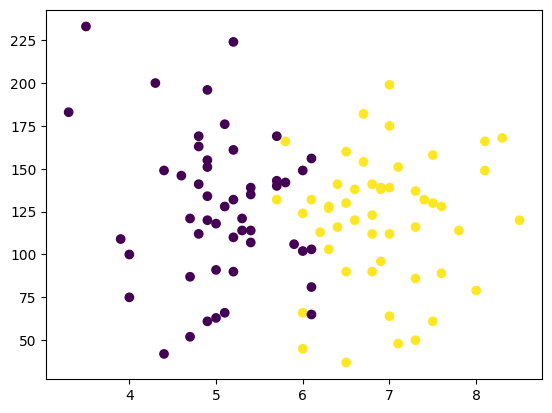

In [6]:
# this is EDA part
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# in this we seperate the dependent an dindependent variables

In [ ]:
x=df.iloc[: ,0:2]   # independent variable
y=df.iloc[: ,-1]    # dependent variable

df.head
x.shape 

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


step 3 train_test_split

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)   # here this takes the 10 percent of data from x and y inthe test data

# randomly koi bhi row uth k testing data me chala jayega 
x_test


,Unnamed: 0,cgpa
95,95,4.3
42,42,7.6
97,97,6.7
23,23,4.7
70,70,6.3
36,36,5.7
84,84,5.7
69,69,8.5
63,63,6.3
57,57,6.5


# now we need to scale the values 
first understabd what does the scaling means
here scaling means bringing all the data into similar numerical range 
now for exmaple in the table there is salary column where the value is like 
90000, 800000, etc and ther ei s age column where value is like 12, 54, 25 etc  so after sc aling it will loke like 0.21 and 0.75 etc centered about zero 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler() # here we have created a object of the standard acalar

x_train= scaler.fit_transform(x_train)
# now Now values are: Centered around zero
x_test= scaler.transform(x_test)





# question : why we need to scale the data that why we need scaking step
answer: We scale data so that all features contribute fairly to the model and algorithms work correctly and efficiently.
Suppose you are predicting house price:

Feature	Value
Area (sq ft)	1200
Bedrooms	3

Now look at the numbers: Area = 1200 and Bedrooms = 3
👉 Area is numerically MUCH larger.

What Model Sees: The model thinks: Area is 400x more important than Bedrooms Even if bedrooms are very important in reality 
This causes: Wrong learning Biased predictions

# Model training 
Model training = Teaching the algorithm to learn patterns from data
In simple words: We give the model input data (X) and correct answers (y) and it learns the relationship between them.

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression() # object of logistic regression is vcreated 
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

 # now here what is logistic regression this question arises 
Despite the name, Logistic Regression is a Classification algorithm, not regression.
It is mainly used for:
👉 Binary Classification
Examples: Spam / Not Spam

In [27]:
y_predict=clf.predict(x_test)
y_test

95    0
42    1
97    1
23    0
70    1
36    0
84    0
69    1
63    1
57    1
Name: placement, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

<Axes: >

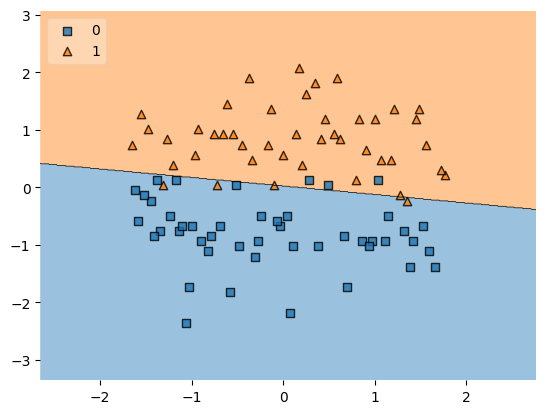

In [31]:
# now we plot the model to visulaize it 
from mlxtend.plotting import plot_decision_regions
     
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [32]:
import pickle
pickle.dump(clf, open('model.pkl','wb'))

# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model